Iteration 100: Position (x, y) = (51.56, 136.29)
Iteration 200: Position (x, y) = (91.64, 123.66)
Iteration 300: Position (x, y) = (121.67, 111.81)
Iteration 400: Position (x, y) = (145.64, 102.72)
Iteration 500: Position (x, y) = (165.74, 96.21)
Iteration 600: Position (x, y) = (182.97, 91.81)
Iteration 700: Position (x, y) = (197.88, 89.10)
Iteration 800: Position (x, y) = (210.88, 87.79)
Iteration 900: Position (x, y) = (222.28, 87.67)
Iteration 1000: Position (x, y) = (232.37, 88.59)
Iteration 1100: Position (x, y) = (241.43, 90.47)
Iteration 1200: Position (x, y) = (249.72, 93.28)
Iteration 1300: Position (x, y) = (257.50, 97.05)
Iteration 1400: Position (x, y) = (265.06, 101.83)
Iteration 1500: Position (x, y) = (272.73, 107.67)
Iteration 1600: Position (x, y) = (280.89, 114.63)
Iteration 1700: Position (x, y) = (290.04, 122.70)
Iteration 1800: Position (x, y) = (300.72, 131.72)
Iteration 1900: Position (x, y) = (313.55, 141.33)
Iteration 2000: Position (x, y) = (329.11, 150.90)


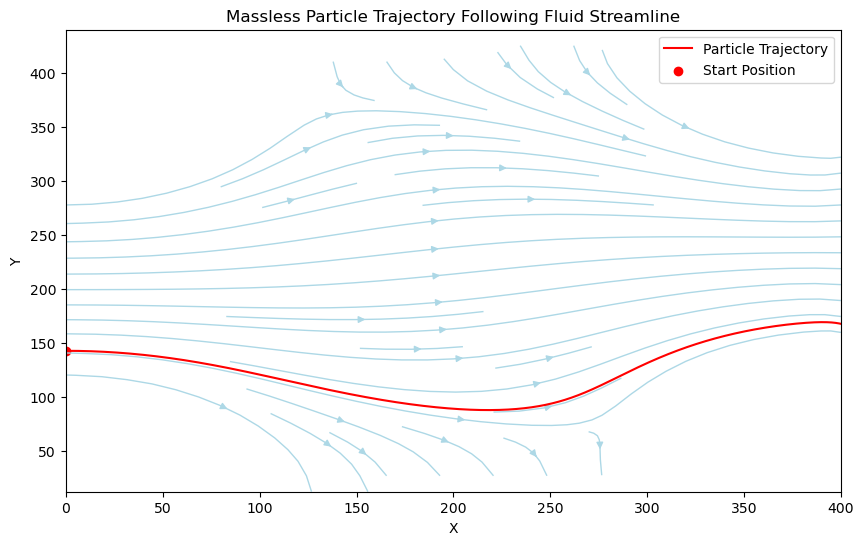

In [22]:
#faster gen-1
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid for plotting
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate with linear method and handle NaNs for visualization
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Replace NaN values with zeros
U = np.nan_to_num(U)
V = np.nan_to_num(V)

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)
U_normalized = U / max_vel
V_normalized = V / max_vel

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u_interp, v_interp):
    """Calculate the next position of the particle using RK4."""
    # k1
    u1, v1 = velocity(x, y, u_interp, v_interp)
    k1x = dt * u1
    k1y = dt * v1

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 1  # Time step
num_steps = 3000  # Number of steps for the particle's trajectory

# Lists to store the particle's trajectory
x_traj = [x0]
y_traj = [y0]

# Start timer for simulation
start_time = time.time()

# Simulate the particle trajectory
for i in range(num_steps):
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u_interp, v_interp)
    x_traj.append(x_next)
    y_traj.append(y_next)
    
    # Print position after every 10 iterations
    if (i + 1) % 100 == 0:
        print(f"Iteration {i + 1}: Position (x, y) = ({x_next:.2f}, {y_next:.2f})")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U_normalized, V_normalized, color='lightblue', linewidth=1)
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Massless Particle Trajectory Following Fluid Streamline')
plt.show()


Iteration 100: Position (x, y) = (51.56, 136.29)
Iteration 200: Position (x, y) = (91.64, 123.66)
Iteration 300: Position (x, y) = (121.67, 111.81)
Iteration 400: Position (x, y) = (145.64, 102.72)
Iteration 500: Position (x, y) = (165.74, 96.21)
Iteration 600: Position (x, y) = (182.97, 91.81)
Iteration 700: Position (x, y) = (197.88, 89.10)
Iteration 800: Position (x, y) = (210.88, 87.79)
Iteration 900: Position (x, y) = (222.28, 87.67)
Iteration 1000: Position (x, y) = (232.37, 88.59)
Iteration 1100: Position (x, y) = (241.43, 90.47)
Iteration 1200: Position (x, y) = (249.72, 93.28)
Iteration 1300: Position (x, y) = (257.50, 97.05)
Iteration 1400: Position (x, y) = (265.06, 101.83)
Iteration 1500: Position (x, y) = (272.73, 107.67)
Iteration 1600: Position (x, y) = (280.89, 114.63)
Iteration 1700: Position (x, y) = (290.04, 122.70)
Iteration 1800: Position (x, y) = (300.72, 131.72)
Iteration 1900: Position (x, y) = (313.55, 141.33)
Iteration 2000: Position (x, y) = (329.11, 150.90)


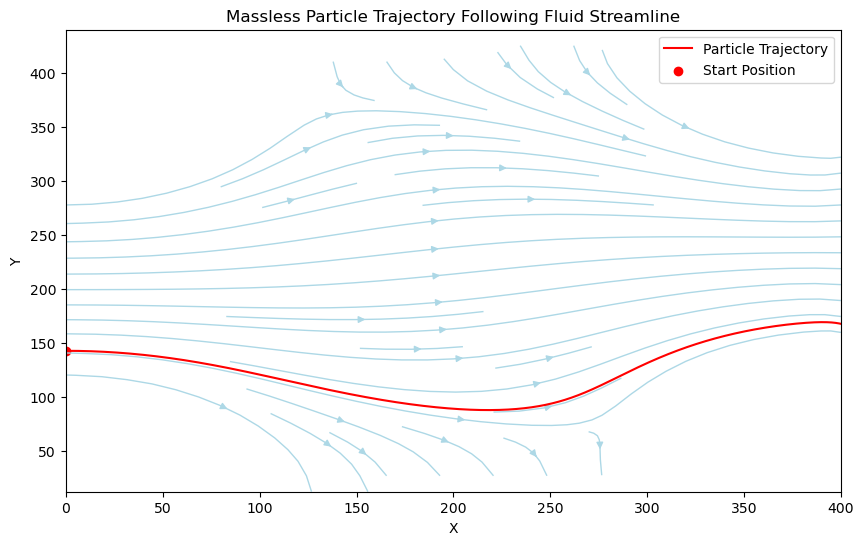

In [23]:
#faster with end condition
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid for plotting
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Interpolate with linear method and handle NaNs for visualization
U = griddata((x, y), u, (X, Y), method='linear')
V = griddata((x, y), v, (X, Y), method='linear')

# Replace NaN values with zeros
U = np.nan_to_num(U)
V = np.nan_to_num(V)

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)
U_normalized = U / max_vel
V_normalized = V / max_vel

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u_interp, v_interp):
    """Calculate the next position of the particle using RK4."""
    # k1
    u1, v1 = velocity(x, y, u_interp, v_interp)
    k1x = dt * u1
    k1y = dt * v1

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 1  # Time step

# Lists to store the particle's trajectory
x_traj = [x0]
y_traj = [y0]

# Start timer for simulation
start_time = time.time()

# Simulate the particle trajectory until x < 399.99 and y > 0.01
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u_interp, v_interp)
    x_traj.append(x_next)
    y_traj.append(y_next)
    
    # Print position every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f})")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 6))
plt.streamplot(X, Y, U_normalized, V_normalized, color='lightblue', linewidth=1)
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Massless Particle Trajectory Following Fluid Streamline')
plt.show()


Iteration 100: Position (x, y) = (51.55, 136.29)
Iteration 200: Position (x, y) = (91.63, 123.66)
Iteration 300: Position (x, y) = (121.66, 111.81)
Iteration 400: Position (x, y) = (145.62, 102.72)
Iteration 500: Position (x, y) = (165.72, 96.22)
Iteration 600: Position (x, y) = (182.96, 91.81)
Iteration 700: Position (x, y) = (197.87, 89.11)
Iteration 800: Position (x, y) = (210.87, 87.79)
Iteration 900: Position (x, y) = (222.26, 87.67)
Iteration 1000: Position (x, y) = (232.36, 88.58)
Iteration 1100: Position (x, y) = (241.42, 90.46)
Iteration 1200: Position (x, y) = (249.71, 93.28)
Iteration 1300: Position (x, y) = (257.49, 97.05)
Iteration 1400: Position (x, y) = (265.05, 101.82)
Iteration 1500: Position (x, y) = (272.71, 107.66)
Iteration 1600: Position (x, y) = (280.88, 114.62)
Iteration 1700: Position (x, y) = (290.01, 122.68)
Iteration 1800: Position (x, y) = (300.69, 131.70)
Iteration 1900: Position (x, y) = (313.51, 141.30)
Iteration 2000: Position (x, y) = (329.06, 150.87)


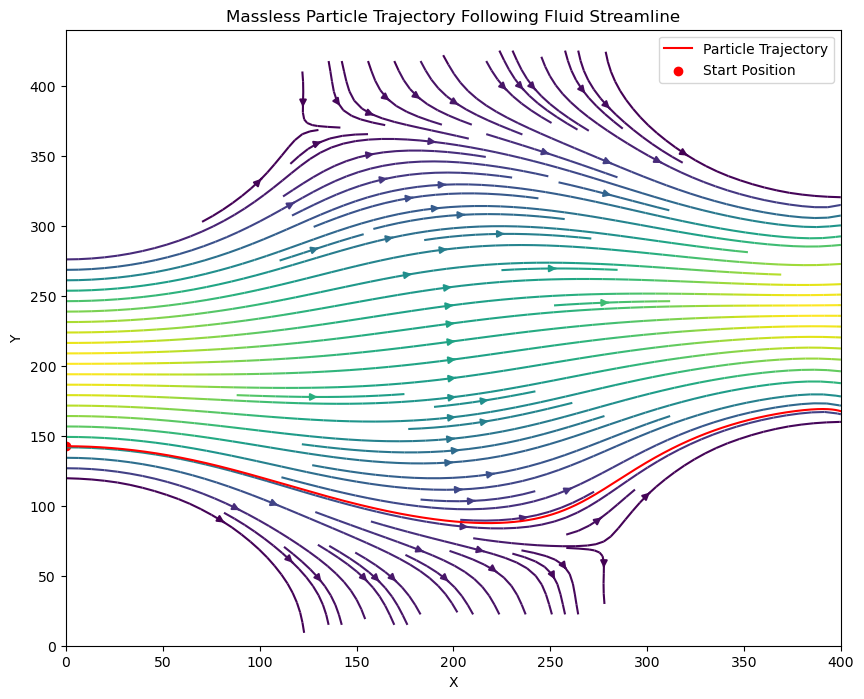

In [33]:
#with end position
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Load your data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Define a regular grid for plotting
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(0, 440, 100)
X, Y = np.meshgrid(x_range, y_range)




# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u_interp, v_interp):
    """Calculate the next position of the particle using RK4."""
    # k1
    u1, v1 = velocity(x, y, u_interp, v_interp)
    k1x = dt * u1
    k1y = dt * v1

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 1  # Time step

# Lists to store the particle's trajectory
x_traj = [x0]
y_traj = [y0]

# Start timer for simulation
start_time = time.time()

# Simulate the particle trajectory until x < 399.99 and y > 0.01
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u_interp, v_interp)
    x_traj.append(x_next)
    y_traj.append(y_next)
    
    # Print position every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f})")

# Find the last non-NaN coordinates
for j in range(len(x_traj) - 1, -1, -1):
    if not (np.isnan(x_traj[j]) or np.isnan(y_traj[j])):
        last_valid_x = x_traj[j]
        last_valid_y = y_traj[j]
        break

print(f"Last valid Position (x, y): ({last_valid_x:.2f}, {last_valid_y:.2f})")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.streamplot(X, Y, U_normalized, V_normalized, color=np.sqrt(U_normalized**2 + V_normalized**2), cmap='viridis', density=2)
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Massless Particle Trajectory Following Fluid Streamline')
plt.show()


Iteration 100: Position (x, y) = (4.89, 139.44)
Iteration 200: Position (x, y) = (9.77, 139.26)
Iteration 300: Position (x, y) = (14.61, 138.96)
Iteration 400: Position (x, y) = (19.41, 138.54)
Iteration 500: Position (x, y) = (24.15, 138.01)
Iteration 600: Position (x, y) = (28.82, 137.38)
Iteration 700: Position (x, y) = (33.41, 136.65)
Iteration 800: Position (x, y) = (37.91, 135.84)
Iteration 900: Position (x, y) = (42.32, 134.94)
Iteration 1000: Position (x, y) = (46.62, 133.97)
Iteration 1100: Position (x, y) = (50.82, 132.93)
Iteration 1200: Position (x, y) = (54.90, 131.84)
Iteration 1300: Position (x, y) = (58.88, 130.71)
Iteration 1400: Position (x, y) = (62.76, 129.53)
Iteration 1500: Position (x, y) = (66.51, 128.32)
Iteration 1600: Position (x, y) = (70.17, 127.09)
Iteration 1700: Position (x, y) = (73.71, 125.84)
Iteration 1800: Position (x, y) = (77.15, 124.58)
Iteration 1900: Position (x, y) = (80.49, 123.32)
Iteration 2000: Position (x, y) = (83.73, 122.05)
Iteration 2

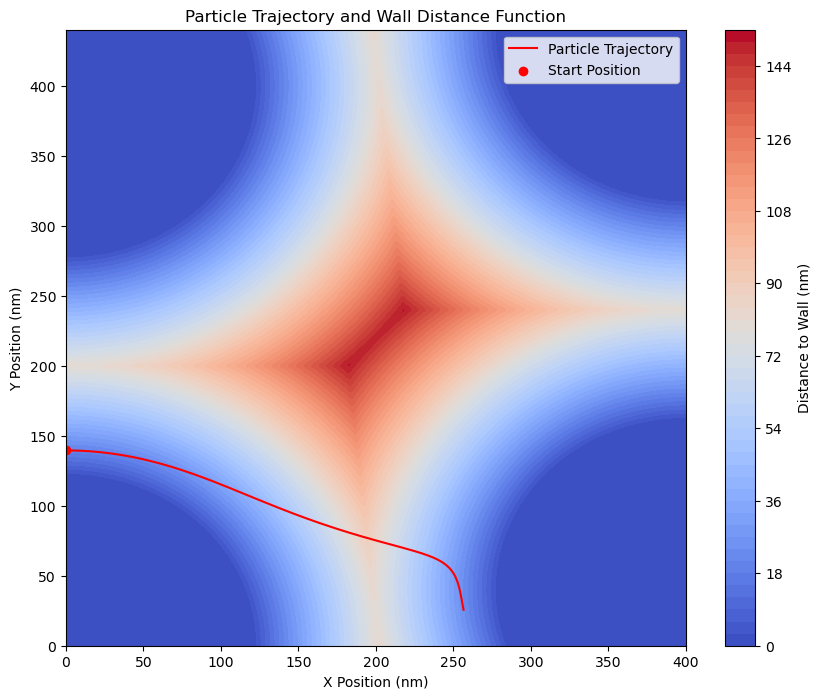

In [89]:
#with wall collision detection (verified)
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius of the post in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 400)
y_range = np.linspace(0, 440, 400)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Create LinearNDInterpolator for wall distance function
wall_distance_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), distances.ravel(), fill_value=np.inf)

# Load the particle velocity data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u_interp, v_interp):
    """Calculate the next position of the particle using RK4."""
    # k1
    u1, v1 = velocity(x, y, u_interp, v_interp)
    k1x = dt * u1
    k1y = dt * v1

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 139.5  # Starting at x=0, y=142.5
dt = 0.1  # Time step

# Lists to store the particle's trajectory
x_traj = [x0]
y_traj = [y0]

# Start timer for simulation
start_time = time.time()

# Simulate the particle trajectory until x < 399.99 and y > 0.01
i = 0
hit_wall = False  # Flag to indicate if the particle has hit the wall
wall_hit_position = None  # To store the position where particle hits the wall

while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u_interp, v_interp)
    x_traj.append(x_next)
    y_traj.append(y_next)
    
    # Interpolate wall distance at the new position
    distance_to_wall = wall_distance_interp(x_next, y_next)
    
    # Check if particle hits the wall (distance <= 22.5 nm)
    if distance_to_wall <= 19.5:
        hit_wall = True
        wall_hit_position = (x_next, y_next)
        print(f"Particle hits the wall at position (x, y) = ({x_next:.2f}, {y_next:.2f}) with wall distance = {distance_to_wall:.2f} nm")
        break  # Exit the loop when wall is hit

    # Print position every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f})")

# Check if particle ever hit the wall
if not hit_wall:
    print("Particle did not hit the wall during the simulation.")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
if wall_hit_position:
    plt.scatter(*wall_hit_position, color='yellow', edgecolor='black', s=100, label='Wall Hit Position')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.legend()
plt.title('Particle Trajectory and Wall Distance Function')
plt.show()


Iteration 100: Position (x, y) = (51.55, 136.29), Wall Distance = 25.73 nm
Iteration 200: Position (x, y) = (91.63, 123.66), Wall Distance = 33.93 nm
Iteration 300: Position (x, y) = (121.66, 111.81), Wall Distance = 45.24 nm
Iteration 400: Position (x, y) = (145.62, 102.72), Wall Distance = 58.21 nm
Iteration 500: Position (x, y) = (165.72, 96.22), Wall Distance = 71.64 nm
Iteration 600: Position (x, y) = (182.96, 91.81), Wall Distance = 84.72 nm
Iteration 700: Position (x, y) = (197.87, 89.11), Wall Distance = 88.01 nm
Iteration 800: Position (x, y) = (210.87, 87.79), Wall Distance = 75.08 nm
Iteration 900: Position (x, y) = (222.26, 87.67), Wall Distance = 64.03 nm
Iteration 1000: Position (x, y) = (232.36, 88.58), Wall Distance = 54.54 nm
Iteration 1100: Position (x, y) = (241.42, 90.46), Wall Distance = 46.42 nm
Iteration 1200: Position (x, y) = (249.71, 93.28), Wall Distance = 39.46 nm
Iteration 1300: Position (x, y) = (257.49, 97.05), Wall Distance = 33.52 nm
Iteration 1400: Pos

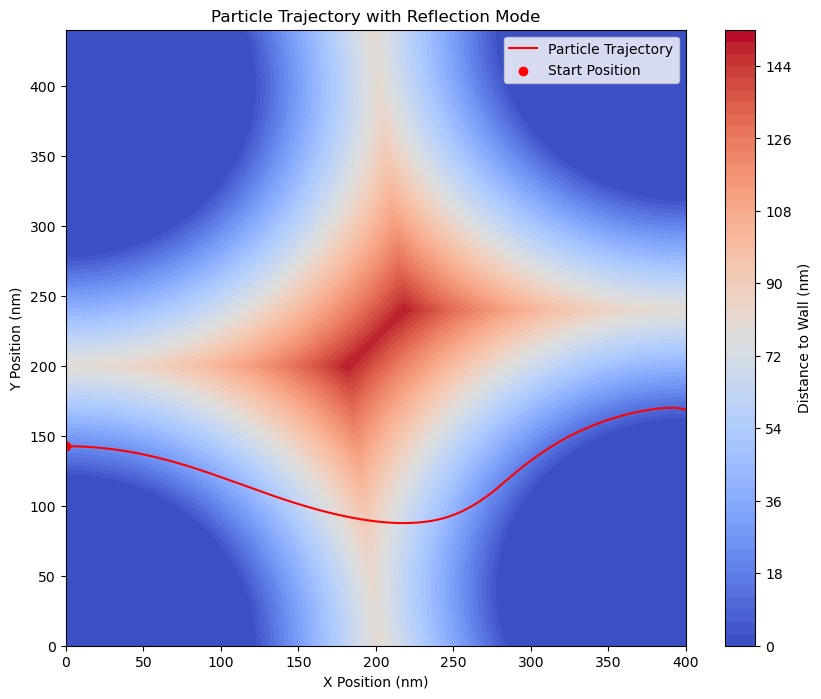

Wall distances at each iteration:
[array(22.50692891), array(22.51257895), array(22.51683052), array(22.51968233), array(22.52113317), array(22.52118171), array(22.51982816), array(22.52604373), array(22.53732429), array(22.54721902), array(22.55571607), array(22.56281396), array(22.5685122), array(22.57280763), array(22.57754773), array(22.59434848), array(22.60981463), array(22.62390035), array(22.6366115), array(22.64794748), array(22.65791427), array(22.66650479), array(22.6838059), array(22.7047502), array(22.72432459), array(22.74253498), array(22.75937859), array(22.77484003), array(22.78891663), array(22.80480572), array(22.83118911), array(22.85620482), array(22.87983808), array(22.90213095), array(22.92308566), array(22.94269653), array(22.9624477), array(22.98874404), array(23.01906931), array(23.04810823), array(23.07586212), array(23.1023245), array(23.12749689), array(23.15325973), array(23.17872047), array(23.21636293), array(23.25385422), array(23.28796704), array(23.32

In [46]:
#1st gen reflection but not correct
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 100)
y_range = np.linspace(0, 440, 100)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Create LinearNDInterpolators for wall distance and normals
wall_distance_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), distances.ravel(), fill_value=np.inf)
normal_x_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_x.ravel(), fill_value=0)
normal_y_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_y.ravel(), fill_value=0)

# Load the particle velocity data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u, v):
    """Calculate the next position of the particle using RK4 with provided velocity components."""
    # k1
    k1x = dt * u
    k1y = dt * v

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 1  # Time step

# Lists to store the particle's trajectory and wall distance
x_traj = [x0]
y_traj = [y0]
wall_distances = []  # To store the wall distance after each iteration

# Start timer for simulation
start_time = time.time()

# Initialize the initial velocity
u, v = velocity(x0, y0, u_interp, v_interp)

# Simulate the particle trajectory with reflection mode
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u, v)
    
    # Interpolate wall distance at the new position
    distance_to_wall = wall_distance_interp(x_next, y_next)
    wall_distances.append(distance_to_wall)  # Append the wall distance to the list
    
    # Check if particle hits the wall (distance <= 22.5 nm)
    if distance_to_wall <= 22.5:
        # Get the normal vector at the point of collision
        nx = normal_x_interp(x_next, y_next)
        ny = normal_y_interp(x_next, y_next)
        
        # Reflect the velocity along the normal
        dot_product = u * nx + v * ny
        u = u - 2 * dot_product * nx
        v = v - 2 * dot_product * ny
        
        
    else:
        # Update the velocity normally if no wall hit
        u, v = velocity(x_next, y_next, u_interp, v_interp)

    # Append the updated position after reflection if necessary
    x_traj.append(x_next)
    y_traj.append(y_next)

    # Print position and wall distance every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f}), Wall Distance = {distance_to_wall:.2f} nm")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.legend()
plt.title('Particle Trajectory with Reflection Mode')
plt.show()



Iteration 100: Position (x, y) = (5.44, 142.44), Wall Distance = 22.55 nm
Iteration 200: Position (x, y) = (10.87, 142.27), Wall Distance = 22.68 nm
Iteration 300: Position (x, y) = (16.27, 141.98), Wall Distance = 22.91 nm
Iteration 400: Position (x, y) = (21.63, 141.58), Wall Distance = 23.23 nm
Iteration 500: Position (x, y) = (26.95, 141.08), Wall Distance = 23.63 nm
Iteration 600: Position (x, y) = (32.21, 140.48), Wall Distance = 24.13 nm
Iteration 700: Position (x, y) = (37.40, 139.79), Wall Distance = 24.71 nm
Iteration 800: Position (x, y) = (42.52, 139.02), Wall Distance = 25.38 nm
Iteration 900: Position (x, y) = (47.55, 138.18), Wall Distance = 26.13 nm
Iteration 1000: Position (x, y) = (52.49, 137.27), Wall Distance = 26.97 nm
Iteration 1100: Position (x, y) = (57.34, 136.31), Wall Distance = 27.88 nm
Iteration 1200: Position (x, y) = (62.10, 135.31), Wall Distance = 28.87 nm
Iteration 1300: Position (x, y) = (66.75, 134.26), Wall Distance = 29.94 nm
Iteration 1400: Positi

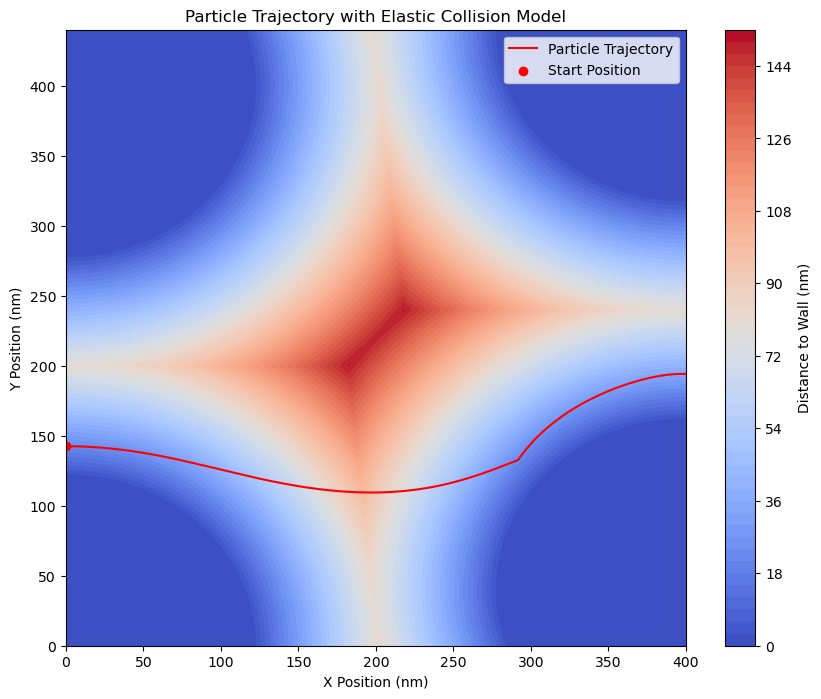

Wall distances at each iteration:
[array(22.50018337), array(22.50035518), array(22.50051542), array(22.50066411), array(22.50080259), array(22.50092962), array(22.50104509), array(22.501149), array(22.50124134), array(22.50132212), array(22.50139133), array(22.50144897), array(22.50149505), array(22.50152955), array(22.50155239), array(22.50156355), array(22.50156305), array(22.50155088), array(22.5017525), array(22.50210076), array(22.50243736), array(22.50276229), array(22.50307555), array(22.50337715), array(22.50366708), array(22.50394534), array(22.50421194), array(22.50446687), array(22.50471013), array(22.50494172), array(22.50516164), array(22.5053699), array(22.50556581), array(22.50574633), array(22.50591518), array(22.50607236), array(22.50628703), array(22.50680168), array(22.50730466), array(22.50779597), array(22.50827759), array(22.50875299), array(22.50921671), array(22.50966874), array(22.51010909), array(22.51053774), array(22.51095471), array(22.51135999), array(22.

In [74]:
#reflection
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 400)
y_range = np.linspace(0, 440, 400)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Create LinearNDInterpolators for wall distance and normals
wall_distance_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), distances.ravel(), fill_value=np.inf)
normal_x_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_x.ravel(), fill_value=0)
normal_y_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_y.ravel(), fill_value=0)

# Load the particle velocity data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u, v):
    """Calculate the next position of the particle using RK4 with provided velocity components."""
    # k1
    k1x = dt * u
    k1y = dt * v

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 0.1  # Time step

# Lists to store the particle's trajectory and wall distance
x_traj = [x0]
y_traj = [y0]
wall_distances = []  # To store the wall distance after each iteration

# Start timer for simulation
start_time = time.time()

# Initialize the initial velocity
u, v = velocity(x0, y0, u_interp, v_interp)

# Simulate the particle trajectory with elastic collision model
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u, v)
    
    # Interpolate wall distance at the new position
    distance_to_wall = wall_distance_interp(x_next, y_next)
    wall_distances.append(distance_to_wall)  # Append the wall distance to the list
    
    # Check if particle hits the wall (distance <= 22.5 nm)
    if distance_to_wall <= 22.5:
        # Get the normal vector at the point of collision
        nx = normal_x_interp(x_next, y_next)
        ny = normal_y_interp(x_next, y_next)
        
        # Reflect the velocity along the normal
        dot_product = u * nx + v * ny
        u = u - 2 * dot_product * nx
        v = v - 2 * dot_product * ny
        
    # Append the updated position after reflection if necessary
    x_traj.append(x_next)
    y_traj.append(y_next)

    # Print position and wall distance every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f}), Wall Distance = {distance_to_wall:.2f} nm")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.legend()
plt.title('Particle Trajectory with Elastic Collision Model')
plt.show()

# Print final wall distances list for reference
print("Wall distances at each iteration:")
print(wall_distances)


Iteration 100: Position (x, y) = (5.44, 142.44), Wall Distance = 22.55 nm
Iteration 200: Position (x, y) = (10.87, 142.27), Wall Distance = 22.69 nm
Iteration 300: Position (x, y) = (16.27, 141.98), Wall Distance = 22.91 nm
Iteration 400: Position (x, y) = (21.63, 141.58), Wall Distance = 23.23 nm
Iteration 500: Position (x, y) = (26.95, 141.08), Wall Distance = 23.64 nm
Iteration 600: Position (x, y) = (32.21, 140.48), Wall Distance = 24.13 nm
Iteration 700: Position (x, y) = (37.40, 139.79), Wall Distance = 24.71 nm
Iteration 800: Position (x, y) = (42.52, 139.02), Wall Distance = 25.38 nm
Iteration 900: Position (x, y) = (47.55, 138.18), Wall Distance = 26.14 nm
Iteration 1000: Position (x, y) = (52.49, 137.27), Wall Distance = 26.97 nm
Iteration 1100: Position (x, y) = (57.34, 136.31), Wall Distance = 27.88 nm
Iteration 1200: Position (x, y) = (62.10, 135.31), Wall Distance = 28.88 nm
Iteration 1300: Position (x, y) = (66.75, 134.26), Wall Distance = 29.95 nm
Iteration 1400: Positi

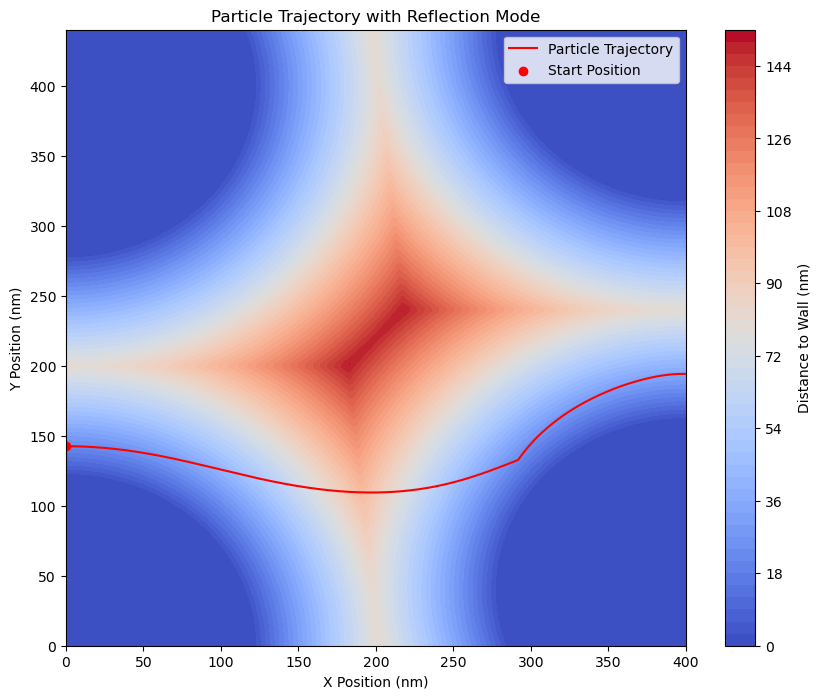

Wall distances at each iteration:
[array(22.50037961), array(22.50074766), array(22.50110416), array(22.50144911), array(22.5017825), array(22.50210434), array(22.50241462), array(22.50271335), array(22.50300052), array(22.50327613), array(22.50354018), array(22.50379267), array(22.5040336), array(22.50426297), array(22.50448067), array(22.50468671), array(22.50488108), array(22.50506378), array(22.50523482), array(22.50539419), array(22.50553825), array(22.50566836), array(22.5057868), array(22.50589357), array(22.50598867), array(22.5060721), array(22.50614387), array(22.50620397), array(22.5062524), array(22.50628916), array(22.50631425), array(22.50632767), array(22.50632942), array(22.5063195), array(22.50629792), array(22.50626466), array(22.5062876), array(22.50699258), array(22.50768589), array(22.50836754), array(22.50903752), array(22.50969582), array(22.51034243), array(22.51097736), array(22.51160059), array(22.51221212), array(22.51281197), array(22.51340013), array(22.513

In [72]:
#reflection with reposition
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Define the wall distance threshold for reflection
WALL_DISTANCE_THRESHOLD = 22.5  # nm

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius in nanometers

# Create a grid to compute distances
x_range = np.linspace(0, 400, 200)
y_range = np.linspace(0, 440, 200)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Create LinearNDInterpolators for wall distance and normals
wall_distance_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), distances.ravel(), fill_value=np.inf)
normal_x_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_x.ravel(), fill_value=0)
normal_y_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_y.ravel(), fill_value=0)

# Load the particle velocity data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Field.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Normalize the velocity components
maxu = np.max(np.abs(U))
maxv = np.max(np.abs(V))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u, v):
    """Calculate the next position of the particle using RK4 with provided velocity components."""
    # k1
    k1x = dt * u
    k1y = dt * v

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, 142.5  # Starting at x=0, y=142.5
dt = 0.1  # Time step

# Lists to store the particle's trajectory and wall distance
x_traj = [x0]
y_traj = [y0]
wall_distances = []  # To store the wall distance after each iteration

# Start timer for simulation
start_time = time.time()

# Initialize the initial velocity
u, v = velocity(x0, y0, u_interp, v_interp)

# Simulate the particle trajectory with reflection mode
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u, v)
    
    # Interpolate wall distance at the new position
    distance_to_wall = wall_distance_interp(x_next, y_next)
    wall_distances.append(distance_to_wall)  # Append the wall distance to the list
    
    # Check if particle hits the wall (distance <= WALL_DISTANCE_THRESHOLD)
    if distance_to_wall <= WALL_DISTANCE_THRESHOLD:
        # Get the normal vector at the point of collision
        nx = normal_x_interp(x_next, y_next)
        ny = normal_y_interp(x_next, y_next)
        
        # Reflect the velocity along the normal
        dot_product = u * nx + v * ny
        u = u - 2 * dot_product * nx
        v = v - 2 * dot_product * ny
        
        # Move the particle to the threshold distance of WALL_DISTANCE_THRESHOLD along the normal direction
        x_next = x_next + (WALL_DISTANCE_THRESHOLD - distance_to_wall) * nx
        y_next = y_next + (WALL_DISTANCE_THRESHOLD - distance_to_wall) * ny
        
        # Update distance to ensure it's precisely at WALL_DISTANCE_THRESHOLD
        distance_to_wall = wall_distance_interp(x_next, y_next)
    
    # Append the updated position after reflection if necessary
    x_traj.append(x_next)
    y_traj.append(y_next)

    # Print position and wall distance every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f}), Wall Distance = {distance_to_wall:.2f} nm")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.legend()
plt.title('Particle Trajectory with Reflection Mode')
plt.show()

# Print final wall distances list for reference
print("Wall distances at each iteration:")
print(wall_distances)


Iteration 100: Position (x, y) = (5.13, 140.74), Wall Distance = 20.83 nm
Iteration 200: Position (x, y) = (10.23, 140.55), Wall Distance = 20.93 nm
Iteration 300: Position (x, y) = (15.31, 140.24), Wall Distance = 21.08 nm
Iteration 400: Position (x, y) = (20.33, 139.81), Wall Distance = 21.29 nm
Iteration 500: Position (x, y) = (25.29, 139.27), Wall Distance = 21.55 nm
Iteration 600: Position (x, y) = (30.17, 138.62), Wall Distance = 21.87 nm
Iteration 700: Position (x, y) = (34.96, 137.87), Wall Distance = 22.23 nm
Iteration 800: Position (x, y) = (39.66, 137.02), Wall Distance = 22.65 nm
Iteration 900: Position (x, y) = (44.24, 136.10), Wall Distance = 23.11 nm
Iteration 1000: Position (x, y) = (48.72, 135.10), Wall Distance = 23.61 nm
Iteration 1100: Position (x, y) = (53.07, 134.04), Wall Distance = 24.16 nm
Iteration 1200: Position (x, y) = (57.31, 132.92), Wall Distance = 24.75 nm
Iteration 1300: Position (x, y) = (61.44, 131.76), Wall Distance = 25.38 nm
Iteration 1400: Positi

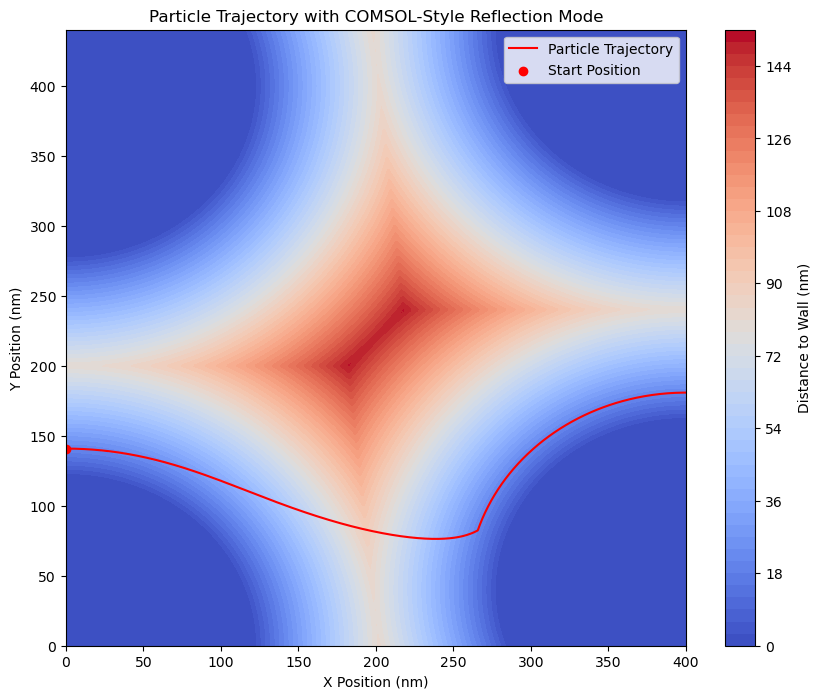

In [6]:
#i believe it got the thing right
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import LinearNDInterpolator, griddata
import pandas as pd
import time

# Define the centers and radius of the circular posts
centers = [(0, 0), (0, 400), (400, 40), (400, 440)]
radius = 120  # radius of pillar nanometers
radius_of_particle = 20.8
y_s = radius + radius_of_particle
wall_distance_threshold = radius_of_particle  # Set the wall distance threshold as a variable


# Create a grid to compute distances
x_range = np.linspace(0, 400, 400)
y_range = np.linspace(0, 440, 400)
X, Y = np.meshgrid(x_range, y_range)

# Calculate the distance from each point in the grid to the nearest circular post
distances = np.full_like(X, np.inf, dtype=float)  # initialize with infinity

for cx, cy in centers:
    distance_to_post = np.sqrt((X - cx)**2 + (Y - cy)**2) - radius
    distances = np.minimum(distances, distance_to_post)  # take the minimum distance

# Set negative distances to zero
distances = np.maximum(distances, 0)

# Calculate the gradient of the wall distance function
dy, dx = np.gradient(distances, y_range, x_range)

# Calculate the magnitude of the gradient (surface normal)
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Initialize normal_x and normal_y with zeros
normal_x = np.zeros_like(dx)
normal_y = np.zeros_like(dy)

# Avoid division by zero by normalizing only where gradient_magnitude is not zero
non_zero_magnitude = gradient_magnitude > 0
normal_x[non_zero_magnitude] = dx[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]
normal_y[non_zero_magnitude] = dy[non_zero_magnitude] / gradient_magnitude[non_zero_magnitude]

# Create LinearNDInterpolators for wall distance and normals
wall_distance_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), distances.ravel(), fill_value=np.inf)
normal_x_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_x.ravel(), fill_value=0)
normal_y_interp = LinearNDInterpolator(list(zip(X.ravel(), Y.ravel())), normal_y.ravel(), fill_value=0)

# Load the particle velocity data
file_path = r"C:\Users\mahir\OneDrive\Desktop\Fieldpinc.csv"
velocity_field_data = pd.read_csv(file_path)

x = velocity_field_data['x'].values
y = velocity_field_data['y'].values
u = velocity_field_data['u1x (m/s) @ t=0.01'].values
v = velocity_field_data['u1y (m/s) @ t=0.01'].values

# Normalize the velocity components
maxu = np.max(np.abs(u))
maxv = np.max(np.abs(v))
max_vel = max(maxu, maxv)

# Create LinearNDInterpolator for U and V fields
u_interp = LinearNDInterpolator(list(zip(x, y)), u / max_vel)  # Normalize during interpolation setup
v_interp = LinearNDInterpolator(list(zip(x, y)), v / max_vel)

def velocity(x, y, u_interp, v_interp):
    """Interpolate velocity at the particle's position."""
    u = u_interp(x, y)
    v = v_interp(x, y)
    return u, v

def rk4_step(x, y, dt, u, v):
    """Calculate the next position of the particle using RK4 with provided velocity components."""
    # k1
    k1x = dt * u
    k1y = dt * v

    # k2
    u2, v2 = velocity(x + k1x / 2, y + k1y / 2, u_interp, v_interp)
    k2x = dt * u2
    k2y = dt * v2

    # k3
    u3, v3 = velocity(x + k2x / 2, y + k2y / 2, u_interp, v_interp)
    k3x = dt * u3
    k3y = dt * v3

    # k4
    u4, v4 = velocity(x + k3x, y + k3y, u_interp, v_interp)
    k4x = dt * u4
    k4y = dt * v4

    # Combine increments to get the next position
    x_next = x + (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    y_next = y + (k1y + 2 * k2y + 2 * k3y + k4y) / 6

    return x_next, y_next

# Initial position of the particle
x0, y0 = 0, y_s  # Starting at x=0, y=142.5
dt = 0.1  # Time step

# Lists to store the particle's trajectory and wall distance
x_traj = [x0]
y_traj = [y0]
wall_distances = []  # To store the wall distance after each iteration

# Start timer for simulation
start_time = time.time()

# Initialize the initial velocity
u, v = velocity(x0, y0, u_interp, v_interp)

# Simulate the particle trajectory with COMSOL-like reflection mode
i = 0
while x_traj[-1] < 399.99 and y_traj[-1] > 0.01:
    x_next, y_next = rk4_step(x_traj[-1], y_traj[-1], dt, u, v)
    
    # Interpolate wall distance at the new position
    distance_to_wall = wall_distance_interp(x_next, y_next)
    wall_distances.append(distance_to_wall)  # Append the wall distance to the list
    
    # Check if particle hits the wall (distance <= wall_distance_threshold)
    if distance_to_wall <= wall_distance_threshold:
        # Get the normal vector at the point of collision
        nx = normal_x_interp(x_next, y_next)
        ny = normal_y_interp(x_next, y_next)
        
        # Reflect the velocity according to the COMSOL-style bounce model
        # Calculate the incident angle and reflect the velocity across the normal
        dot_product = u * nx + v * ny
        u = u - 2 * dot_product * nx
        v = v - 2 * dot_product * ny
        
        # Move the particle to exactly wall_distance_threshold away from the wall along the normal direction
        x_next = x_next + (wall_distance_threshold - distance_to_wall) * nx
        y_next = y_next + (wall_distance_threshold - distance_to_wall) * ny
        
        # Update distance to ensure it's precisely at the threshold after moving
        distance_to_wall = wall_distance_interp(x_next, y_next)
    else:
        u, v = velocity(x_next, y_next, u_interp, v_interp)
        
    
    # Append the updated position after reflection if necessary
    x_traj.append(x_next)
    y_traj.append(y_next)

    # Print position and wall distance every 100 iterations
    i += 1
    if i % 100 == 0:
        print(f"Iteration {i}: Position (x, y) = ({x_next:.2f}, {y_next:.2f}), Wall Distance = {distance_to_wall:.2f} nm")

# End timer for simulation
end_time = time.time()
total_time = end_time - start_time
print(f"Total simulation time: {total_time:.2f} seconds")

# Plot the results
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, distances, levels=50, cmap='coolwarm')
plt.colorbar(label='Distance to Wall (nm)')
plt.plot(x_traj, y_traj, 'r-', label='Particle Trajectory')
plt.scatter([x0], [y0], color='red', label='Start Position')
plt.xlabel('X Position (nm)')
plt.ylabel('Y Position (nm)')
plt.legend()
plt.title('Particle Trajectory with COMSOL-Style Reflection Mode')
plt.show()

